In [1]:
import os
import sys
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn

# NOTE: I am ignoring the max iteration warnings for nmf
warnings.filterwarnings("ignore")

cwd = os.getcwd()
#par = os.path.join(cwd, os.pardir)
par = os.path.dirname(cwd)
sys.path.append(par)

# I made some modules to make importing easier and to have a nice class
# that does all the matrix operations
import matrix_operation
import Dataset
import state_set
import nmf_clustering

In [2]:
# Just to reload the modules I imported above so I dont need to restart the kernel after making changes
import importlib
importlib.reload(matrix_operation)
importlib.reload(Dataset)
importlib.reload(state_set)
importlib.reload(nmf_clustering)

from matrix_operation import mat_opr
from Dataset import dataset
from state_set import state_data
from state_set import state_test_data
from nmf_clustering import nmf_cluster

### Import data

In [3]:
state_dset = state_data(get_state_dat= True)

In [4]:
# I'm dropping Virgin Islands, Guam, Puerto Rico becuase unfortunately the data is a bit inconsistent
state_dset = mat_opr(state_dset.dataframe.drop(["Virgin Islands", "Guam", "Puerto Rico"],axis = 1))

### Iso + Normalize

In [5]:
# ia0 and normalize:
state_iso = state_dset.known_iso()
state_norm = state_iso.normalizer()

### Choose a Rank

In [6]:
state_errors = []
for i in range(15):
    nmfed = state_norm.sci_nmf(components=i+1)
    state_errors.append(state_norm.mean_square_error(nmfed, 0))

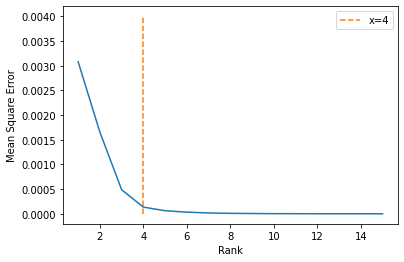

In [7]:
plt.plot(list(range(1,16)), state_errors)
plt.vlines(x=4, ymin=0, ymax= 0.0040, color="tab:orange", linestyle='dashed', label="x=4")
plt.xlabel("Rank")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show()

## Choose # of clusters

In [8]:
clus = nmf_cluster(state_norm.dataframe, 4, clusters=None, cluster_method='kmeans', num_outliers=None)

### Pairplot

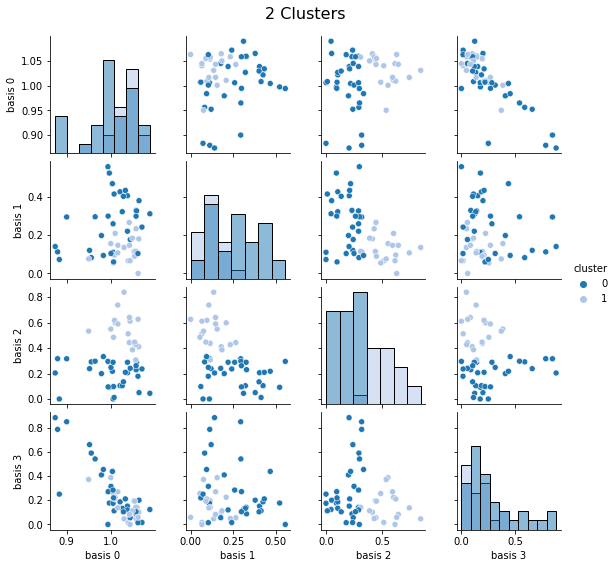

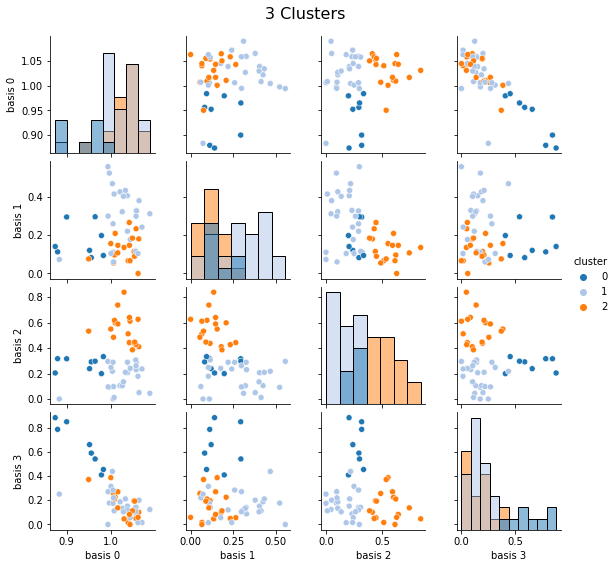

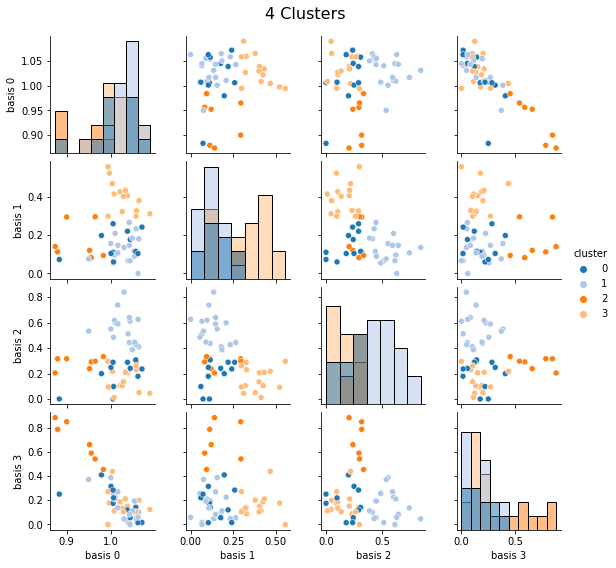

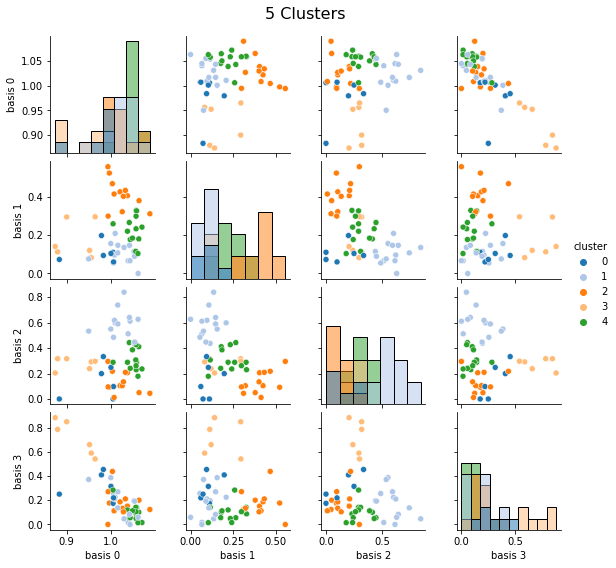

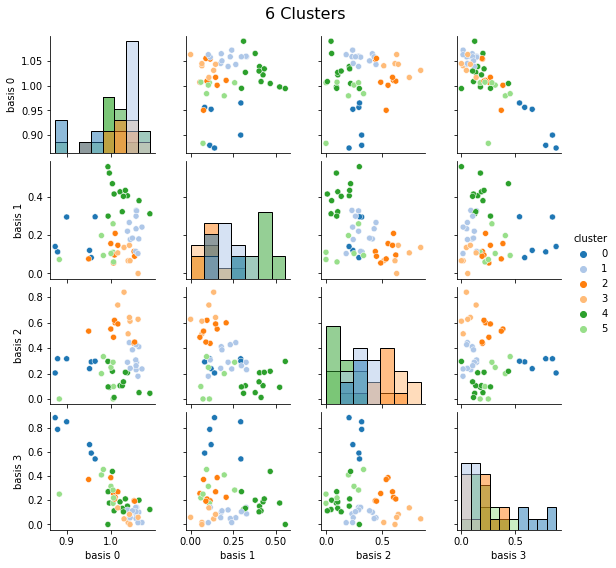

In [9]:
clus.pairplotter([2,3,4,5,6])

### Pairwise distance

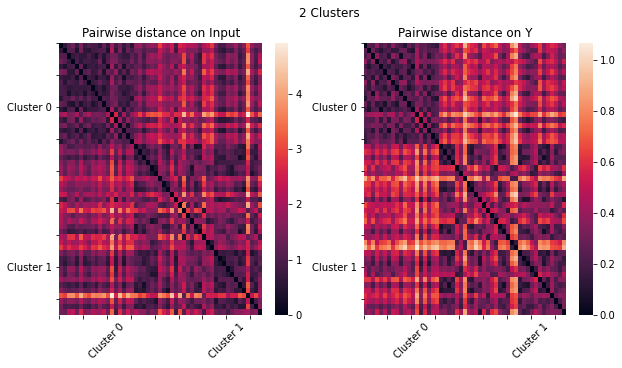

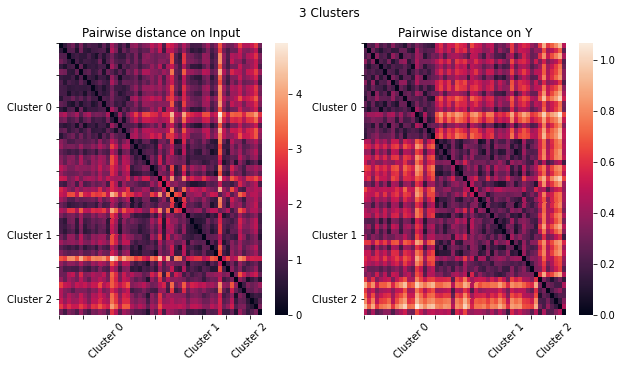

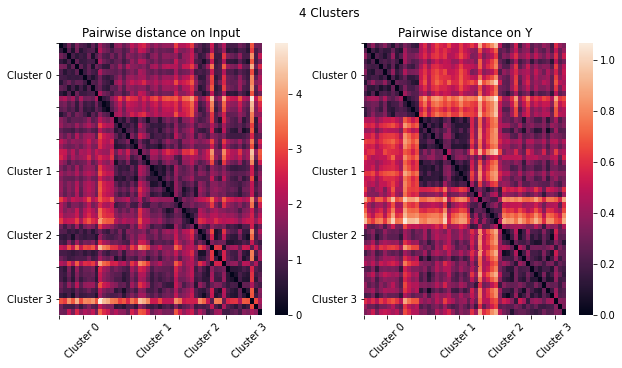

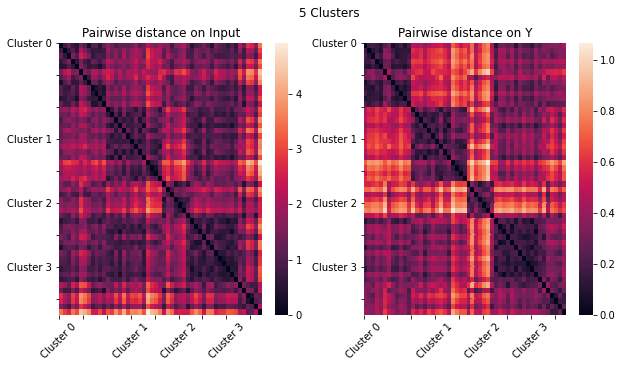

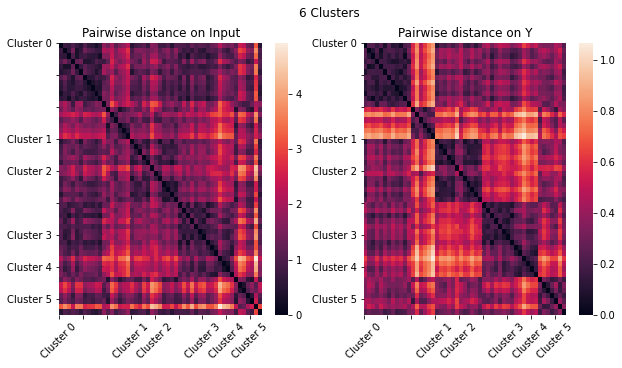

In [10]:
clus.pairwise_plotter(num_tries = [2,3,4,5,6])

### Results for tweaking

In [11]:
clust = nmf_cluster(state_norm.dataframe, rank=4, clusters=3, cluster_method='kmeans', num_outliers=None)

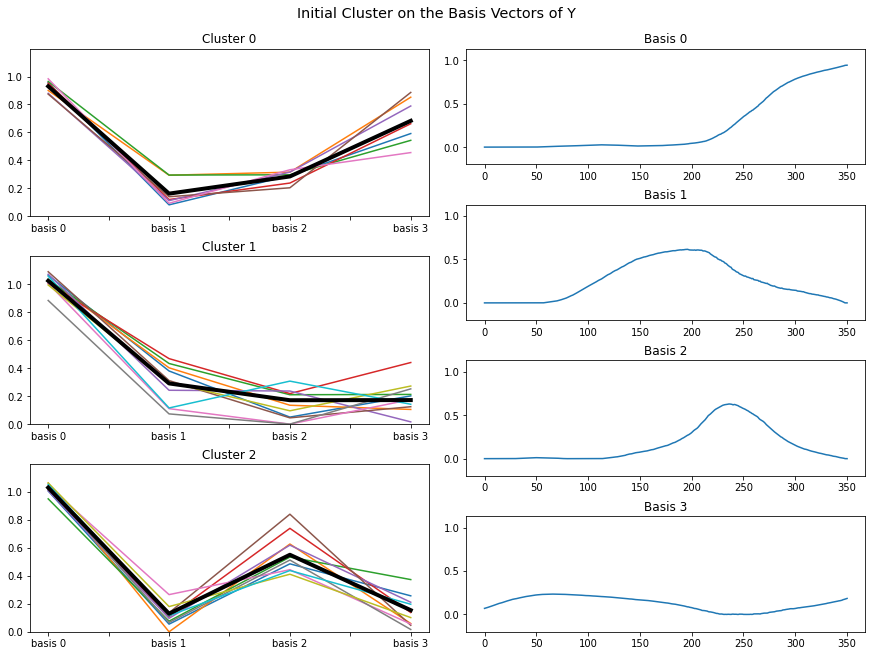

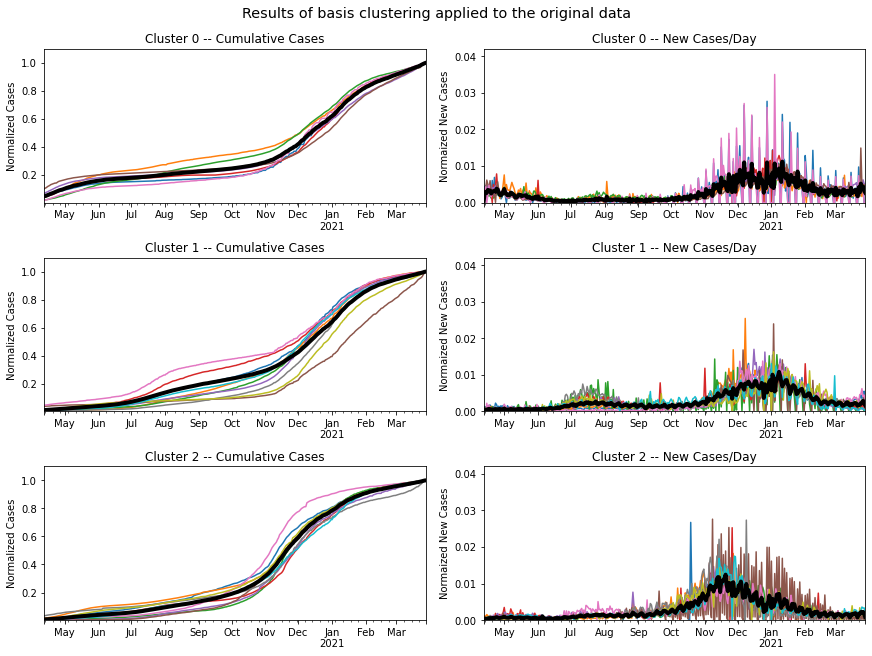

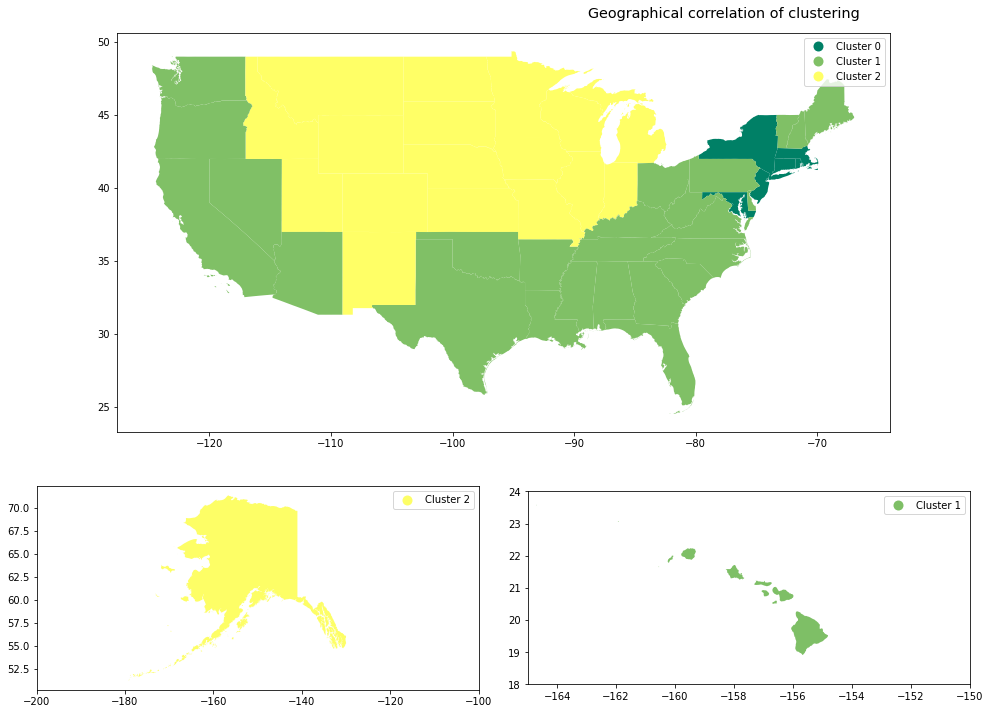

In [12]:
clust.results()

# Same Process with Positive Testing Rates (# cases / # tests per 100,000):

In [13]:
test_data = state_test_data(get_test_dat=True)
test_div = test_data.dataframe.drop(["Virgin Islands", "Guam", "Puerto Rico"],axis = 1)
test_div = test_div.replace(0, np.nan)
test_div = test_div.fillna(method='ffill', axis = 0)
test_rates = state_dset.dataframe.astype(float) / test_div

In [14]:
test_dset = mat_opr(test_rates)

### Normalization

In [15]:
# No missing values
test_dset.dataframe.isna().values.any()

False

In [16]:
#t_inp = mat_opr(test_dset.dataframe)
test_dset = test_dset.normalizer(maxer=True)

In [17]:
test_errors = []
for i in range(15):
    nmfed = test_dset.sci_nmf(components=i+1)
    test_errors.append(test_dset.mean_square_error(nmfed, 0))

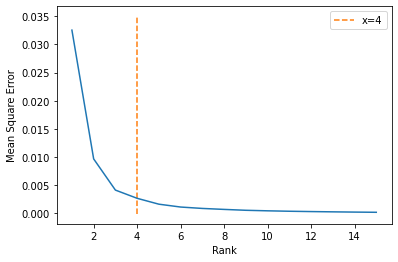

In [18]:
plt.plot(list(range(1,16)), test_errors)
plt.vlines(x=4,ymin=-0.0001,ymax=0.035, color="tab:orange", linestyle='dashed', label="x=4")
plt.xlabel("Rank")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show()

## Determine best # of clusters

In [19]:
test_clus = nmf_cluster(test_dset.dataframe, 3, clusters=None, cluster_method='kmeans', num_outliers=None)

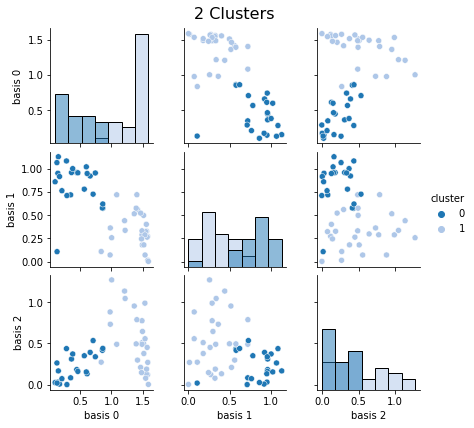

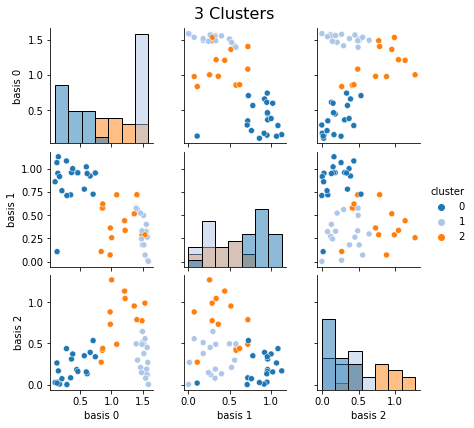

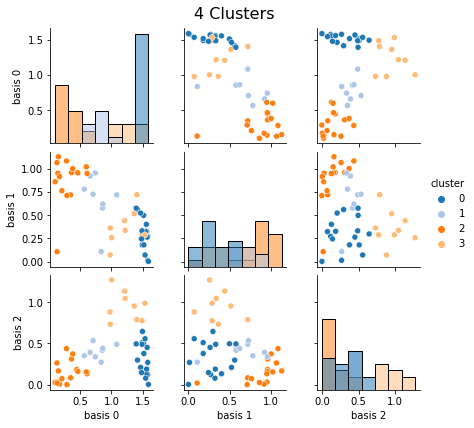

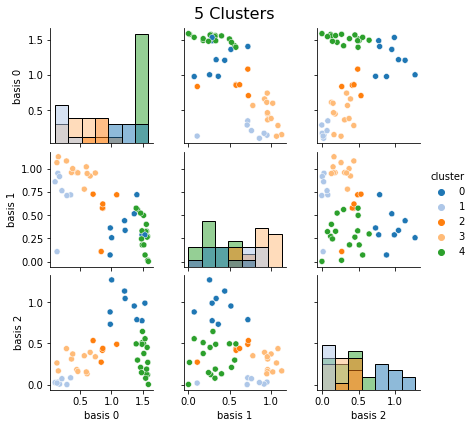

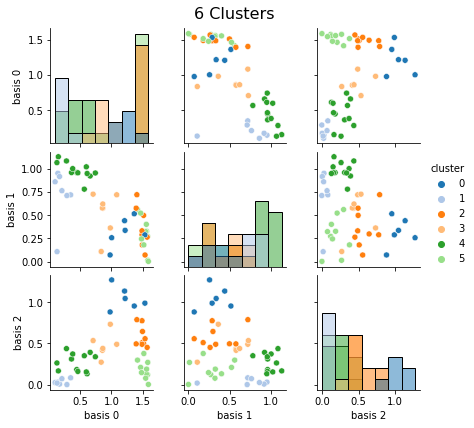

In [20]:
test_clus.pairplotter([2,3,4,5,6])

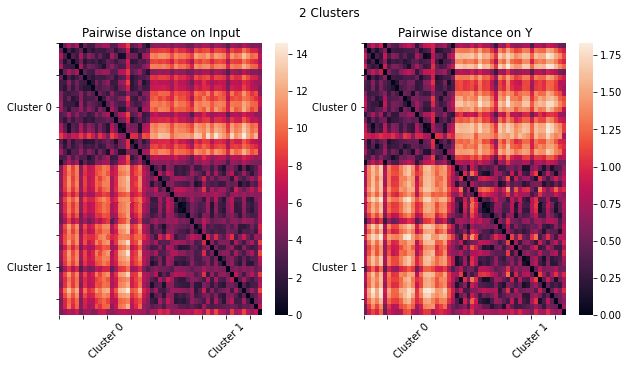

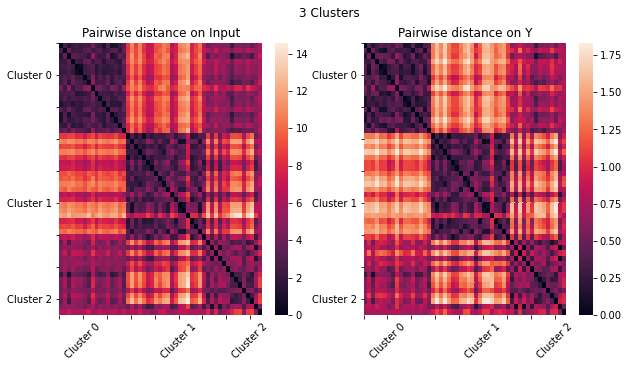

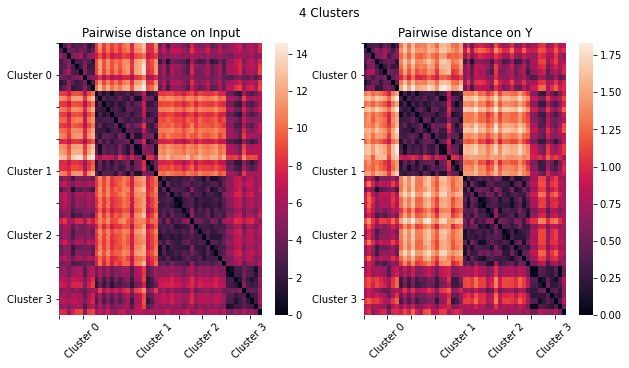

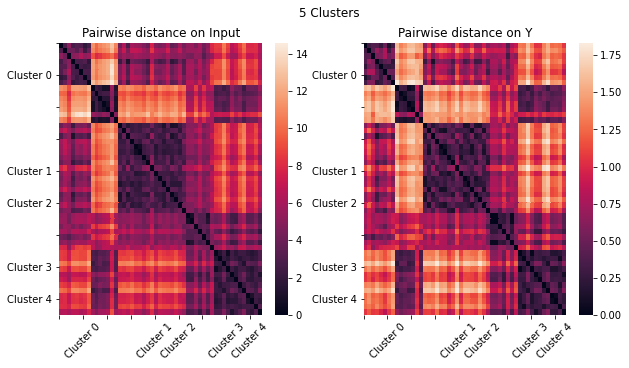

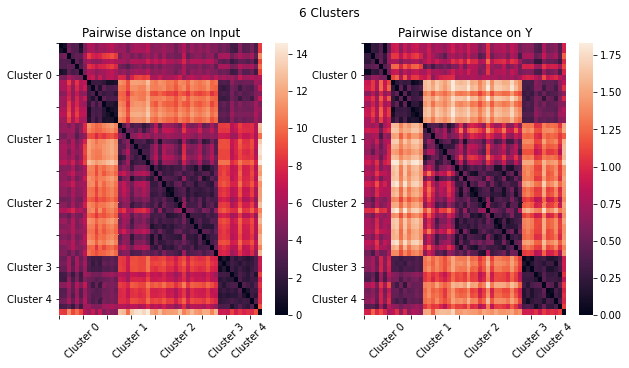

In [21]:
test_clus.pairwise_plotter(num_tries = [2,3,4,5,6])

In [22]:
test_clust = nmf_cluster(test_dset.dataframe, rank=3, clusters=6, cluster_method='kmeans', num_outliers=None)

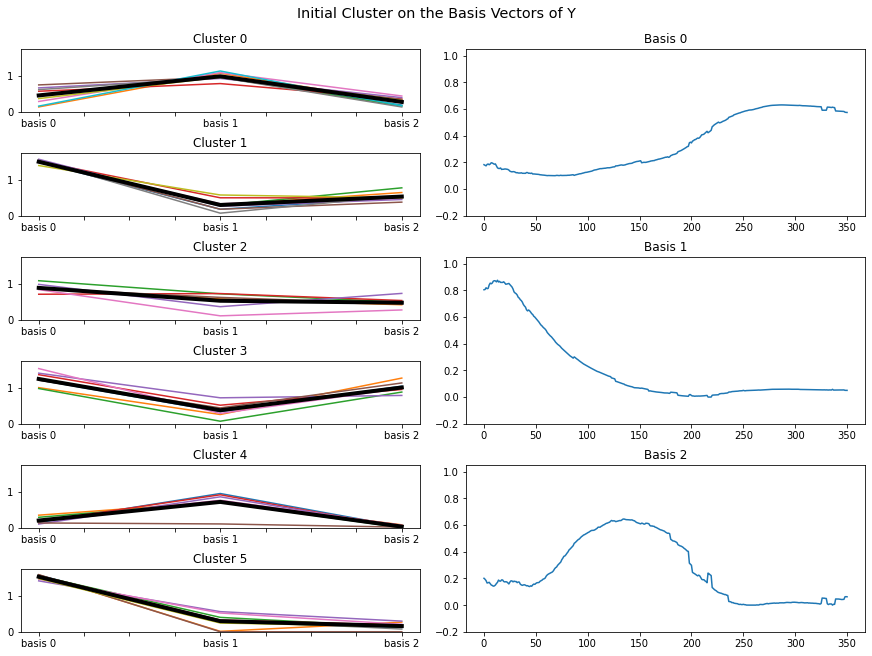

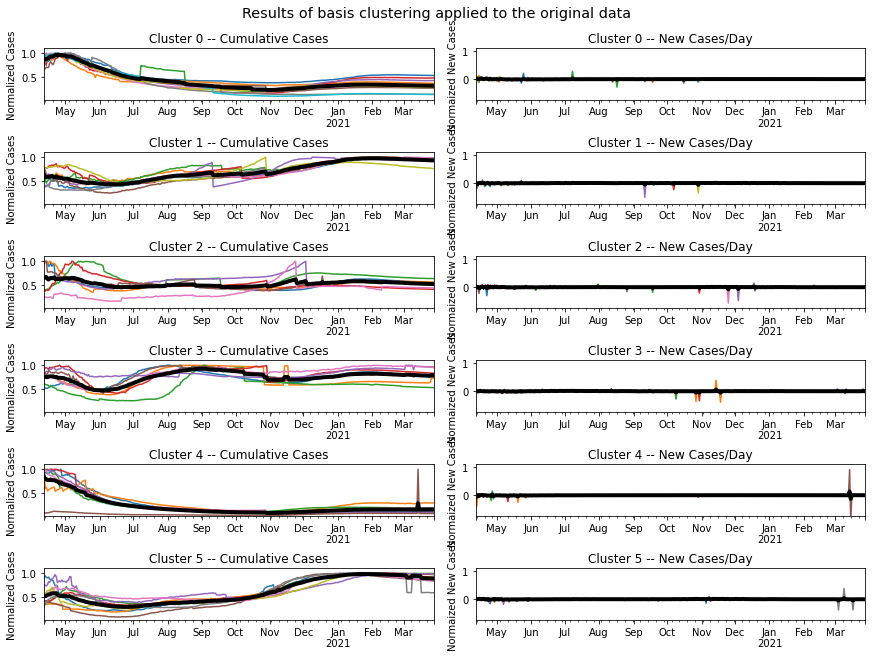

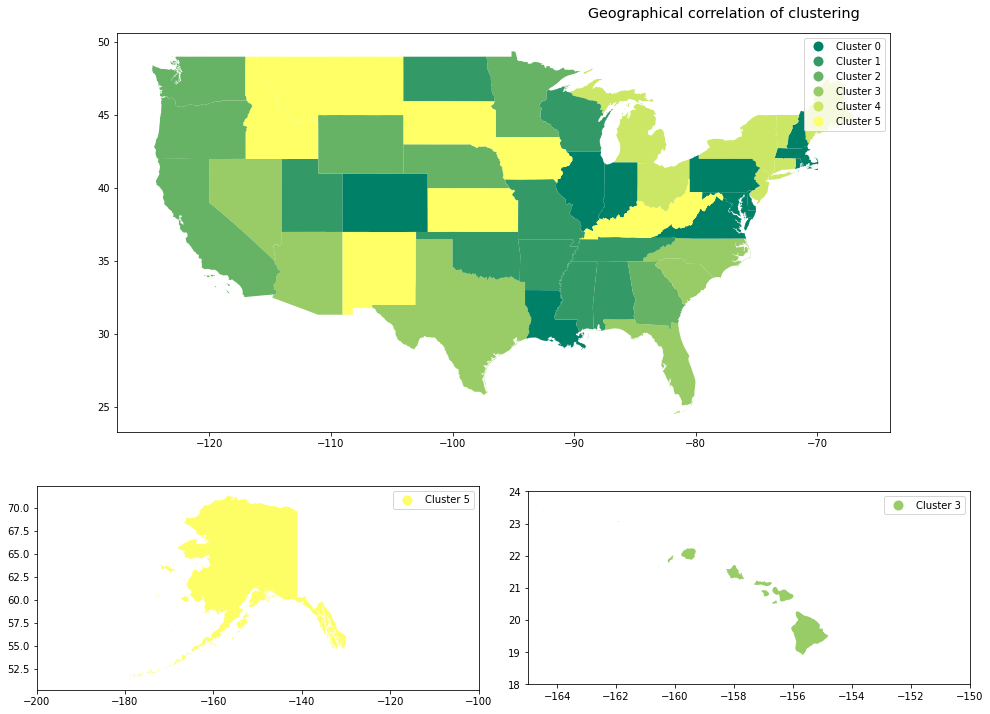

In [23]:
test_clust.results()